In [11]:
# Import needed packages in PEP 8 order (no unused imports listed) (4 points total)

# Import required libraries here
import os
from glob import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
import rasterio as rio
from rasterio.plot import plotting_extent
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import box
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import tarfile
import zipfile

In [2]:
os.chdir(os.path.join(et.io.HOME,'earth-analytics'))

In [21]:
CPER_directory = os.path.join('NEON','CPER')
ONAQ_directory = os.path.join('NEON','ONAQ')
LANDSAT_path = os.path.join(ONAQ_directory,'LANDSAT')

# tf_AVIRIS = tarfile.open(os.path.join(CPER_directory,'AVIRIS','f170509t01p00r05.tar.gz'))
# tf_AVIRIS.extractall(path=os.path.join('CPER_directory','AVIRIS'))
tf_LANDSAT = tarfile.open(os.path.join(
    ONAQ_directory,'LC08_L1TP_038032_20171010_20171024_01_T1.tar.gz'))
tf_LANDSAT.extractall(path=LANDSAT_path)

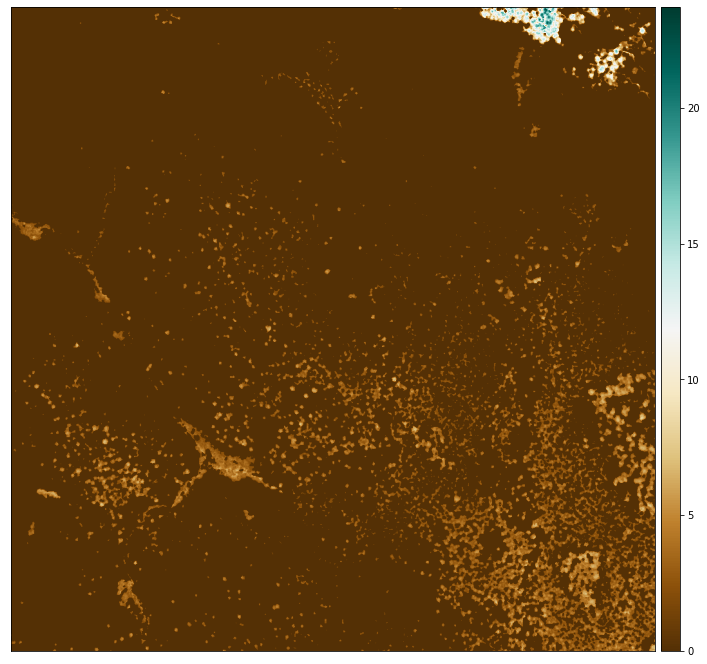

In [4]:
# with rio.open('LC08_L1TP_033032_20170516_20180125_01_T1_sr_band1.tif') as src_band:
#     arr = src_band.read(1,masked=True)
# src_band.crs
with rio.open(os.path.join(CPER_directory,'NEON_ecosystem-structure','NEON_D15_ONAQ_DP3_368000_4454000_CHM.tif')) as src:
    arr_CHM = src.read(1,masked=True)
src.meta
ep.plot_bands(arr_CHM,
             cmap='BrBG',
             scale=False)

In [14]:
help(tarfile.open)

Help on method open in module tarfile:

open(name=None, mode='r', fileobj=None, bufsize=10240, **kwargs) method of builtins.type instance
    Open a tar archive for reading, writing or appending. Return
    an appropriate TarFile class.
    
    mode:
    'r' or 'r:*' open for reading with transparent compression
    'r:'         open for reading exclusively uncompressed
    'r:gz'       open for reading with gzip compression
    'r:bz2'      open for reading with bzip2 compression
    'r:xz'       open for reading with lzma compression
    'a' or 'a:'  open for appending, creating the file if necessary
    'w' or 'w:'  open for writing without compression
    'w:gz'       open for writing with gzip compression
    'w:bz2'      open for writing with bzip2 compression
    'w:xz'       open for writing with lzma compression
    
    'x' or 'x:'  create a tarfile exclusively without compression, raise
                 an exception if the file is already created
    'x:gz'       create a g

In [5]:
NEON_sites = gpd.read_file(os.path.join('NEON','NEON_Field_Sites','NEON_Field_Sites_v16_1.shp'))
CPER_pt=NEON_sites[NEON_sites['siteID'].str.match('CPER')]
#df[df['model'].str.match('Mac')]

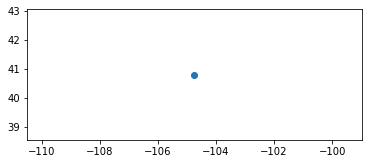

In [6]:
CPER_pt.plot()

In [27]:
NEON_Field_Sites= gpd.read_file(os.path.join(
    'NEON', 'NEON_Field_Sampling_Boundaries',
    'NEON_Field_Sampling_Boundaries.shp'))
CPER_bnd=NEON_Field_Sites[NEON_Field_Sites['siteID'].str.match('CPER')]
AIM_sites=gpd.read_file(os.path.join('AIM','AIM_ONAQ_2017.shp'))
NEON_site_bnd_ARC = gpd.read_file(
    os.path.join(ONAQ_directory,
                 'NEON_ONAQ_site_boundary',
                'NEON_ONAQ.shp'))
AIM_sites.crs,NEON_site_bnd_ARC.crs

(<Geographic 2D CRS: EPSG:4269>
 Name: NAD83
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: North America - NAD83
 - bounds: (167.65, 14.92, -47.74, 86.46)
 Datum: North American Datum 1983
 - Ellipsoid: GRS 1980
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

ImportError: The descartes package is required for plotting polygons in geopandas. You can install it using 'conda install -c conda-forge descartes' or 'pip install descartes'.

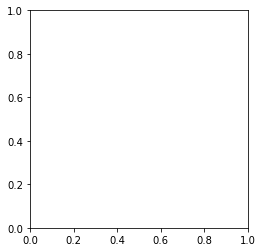

In [38]:
NEON_site_bnd_ARC.plot()

In [25]:
CPER_bnd.head()

,FID,domainNumb,domainName,siteType,siteName,siteID,siteHost,areaKm2,acres,Shape__Are,Shape__Len,GlobalID,geometry
19,20,D10,Central Plains,Core Terrestrial,Central Plains Experimental Range,CPER,"U.S. Department of Agriculture, Agriculture Re...",65.398127,16160.164452,1.144184e+08,62253.624028,7de573b6-7775-41ea-9775-11b67c0657ed,"POLYGON ((-104.67717 40.86986, -104.67669 40.7..."


In [35]:
ONAQ_CHM=os.path.join(
    ONAQ_directory,'ONAQ_CHM',
    'NEON_D15_ONAQ_DP3_376000_4455000_CHM.tif')
with rio.open(ONAQ_CHM) as src_CHM:
    ONAQ_CHM_arr=src_CHM.read(1,masked=True)
src_CHM.crs

CRS.from_epsg(32612)

In [36]:
ONAQ_LANDSAT=os.path.join(
    LANDSAT_path,
    'LC08_L1TP_038032_20171010_20171024_01_T1_B1.TIF')
with rio.open(ONAQ_LANDSAT) as src_LST:
    ONAQ_LANDSAT_arr=src_LST.read(1,masked=True)
src_LST.crs

CRS.from_epsg(32612)